### EXPLANATORY ANALYSIS

For the FIFA21 project, we were presented with a table of data regarding professional football player’s personal, professional and skills information. The goal was to build a model so in the future, we could predict the overall player’s rating score.
Our group first imported the different packages to be able to: get, read and work with the data.
After reading the data, we started cleaning the data by dividing the multiple columns into 2 groups of 51 (out of the 102), so it would be easier to check its values and work with a smaller list.
When cleaning the data, we performed the following actions:
- Standardized the column names by lowering its cases and replacing the spaces with underscores
- Noticed the relationships with the different variables: dropped the ones that we tought were going to be redundant for our model, kept the variables we thought would be relevant.

    ####  Dropped variables:
    
- Unnamed: most likely a copy of the ID variable. Noticed it with “Group by” function
- Club related variables: we got rid of all club related variables like Team & Contract, Joined, Loan Date End, etc.
- Position: kept the BP value as it added more value to our model
- Dropped all football skills variables: all mostly included in Base Stats and Total Stats

    #### Kept values:
- Height, Weight, Foot: tought physical attributed could be a factor which impacts the overall rating of a player (ova)
- Base Stats & Total Stats: highly correlated with ova.
- Variables that describre player money valuation: could be related that the most a player is paid is because it is correlated with its ova.
- BP & player best position score: the players best position needs to be in the model because the ova is most likely coming from the player best position rating score.

    #### Divided the numerical and categorical variables and started the following EDA steps:
- Transforming numerical types stored as categorical into numerical variables by defining functions and pandas commands. Example: removing euro symbols
- Visualization analysis: pairplot, displots, boxplots and heatmap.
- Creation of new data frames with cleaned values
Concatenated each cleaned variable into a final data frame.
- Checked correlations between final variables using heatmap to decided whether to drop any other before creating the prediction model or not.

    #### Creation of the prediction model.
- X-y split by defining “ova” as target variable
- Build the model applying the linear regression method
- Train-test split to fit the model with our final data
Model validation.
- Calculated R2, MSE, RMSE and MAE
Noticed our model was better than expected with a model score of 0.79 and mean absolute error of 2.4.

    #### However, we tried to improve the model prediction by:
- Normalizing the numerical variables with MinMaxScale
- Introduced relevant categorical variables like international rating(?) and BP
- Introduced a key numerical variable by using panda’s melt function: players best position score
- After repeating the prediction model steps, we reached a model score of 0.98 with a mean absolute error of 0.8(?).
In conclusion, it is clear that the overall rating of a player depends mostly on the players best position score. If we just used the total and base stats we would have been able to predict a players overall rating but not super accuratelly. On the other hand, physical and personal information values were not useful when trying to predict a player’s ova.
In the future, if we would like to build a new model, we should focus on the players best position score which would lead to lesser use of redundant variables, speeding up the computer prediction model results.

In [1]:
# Priint more than 1 output within the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing all dedicated libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import PowerTransformer
import pickle

In [3]:
# Print whole df if necessary

pd.set_option('display.max_rows', 50)

In [4]:
# Reading files into a DF

df = pd.read_csv('./dataset/fifa21_training.csv')

In [5]:
# Checking the df

df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
# Unpivoting the df to get the value for each player and in the best position

df_melt= df.melt(id_vars= ['Unnamed: 0',
 'ID',
 'Name',
 'Age',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits','OVA'], value_vars= ['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'GK'])

In [7]:
df_m= df_melt[df_melt['BP']== df_melt['variable']]

In [8]:
df_m.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,OVA,variable,value
13701,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,83,75,68,82,33,71,44,77,ST,77+0
13718,5168,209709,B. Edomwonyi,25,Nigeria,FK Austria Wien,ST,ST LM,FK Austria Wien 2018 ~ 2022,"6'1""",...,85,62,52,67,29,71,6,66,ST,66+2
13722,12279,242250,G. Verón,18,Argentina,Argentinos Juniors,ST,ST,Argentinos Juniors 2018 ~ 2021,"6'0""",...,63,57,44,58,30,58,4,59,ST,58+2
13724,4707,206263,T. Hopper,26,England,Lincoln City,ST,ST,Lincoln City 2020 ~ 2023,"6'1""",...,63,62,52,61,34,73,7,63,ST,63+2
13728,4229,203757,Zé Luís,29,Cape Verde,FC Porto,ST,ST,FC Porto 2019 ~ 2023,"6'0""",...,80,75,59,75,33,80,89,77,ST,77+0


In [9]:
# Selecting only certain variables to work with

red_df= df_m[['Name', 'Growth', 'Value', 'Wage', 'Total Stats', 'Base Stats', 'OVA', 'value', 'IR']]

In [10]:
# Organizing the df

red_df= red_df[['Name', 'Wage', 'Value', 'Growth', 'value', 'Base Stats', 'Total Stats', 'IR', 'OVA']]

In [11]:
red_df.head()

,Name,Wage,Value,Growth,value,Base Stats,Total Stats,IR,OVA
13701,Alan Carvalho,€23K,€8.5M,0,77+0,412,1961,2 ★,77
13718,B. Edomwonyi,€6K,€825K,3,66+2,366,1656,1 ★,66
13722,G. Verón,€900,€325K,17,58+2,310,1428,1 ★,59
13724,T. Hopper,€3K,€475K,3,63+2,345,1626,1 ★,63
13728,Zé Luís,€16K,€9M,0,77+0,402,1889,1 ★,77


In [12]:
# Standarazing headers

red_df.columns= red_df.columns.str.lower().str.replace(' ','_')
#red_df.head(1)

In [13]:
red_df.columns
red_df.columns= ['name', 'wage', 'value', 'growth', 'bp_stats', 'base_stats', 'total_stats', 'ir', 'ova']

Index(['name', 'wage', 'value', 'growth', 'value', 'base_stats', 'total_stats',
       'ir', 'ova'],
      dtype='object')

In [14]:
red_df.head(2)

,name,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
13701,Alan Carvalho,€23K,€8.5M,0,77+0,412,1961,2 ★,77
13718,B. Edomwonyi,€6K,€825K,3,66+2,366,1656,1 ★,66


In [15]:
# Standarizing data and converting to correct type

red_df['wage']= red_df['wage'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace('★','')
red_df['value']= red_df['value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace('★','')
red_df['bp_stats']= red_df['bp_stats'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace('★','')
red_df['ir']= red_df['ir'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.','').str.replace('★','')

In [16]:
red_df['bp_stats']= red_df['bp_stats'].apply(lambda x : x.split('+')[0])

In [17]:
red_df.head(2)

,name,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
13701,Alan Carvalho,23000,85000000,0,77,412,1961,2,77
13718,B. Edomwonyi,6000,825000,3,66,366,1656,1,66


In [18]:
red_df[['wage', 'value', 'bp_stats', 'ir']] = red_df[['wage', 'value', 'bp_stats', 'ir']].astype(int)

In [19]:
red_df.dtypes

name           object
wage            int64
value           int64
growth          int64
bp_stats        int64
base_stats      int64
total_stats     int64
ir              int64
ova             int64
dtype: object

In [20]:
# Checking missing vals

red_df.isnull().sum()

name           0
wage           0
value          0
growth         0
bp_stats       0
base_stats     0
total_stats    0
ir             0
ova            0
dtype: int64

In [21]:
df_num= red_df.select_dtypes(include= np.number)
#df_cat= df.select_dtypes(include= np.cat)

In [22]:
df_num.head()
df_num.dtypes
df_num.columns

,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
13701,23000,85000000,0,77,412,1961,2,77
13718,6000,825000,3,66,366,1656,1,66
13722,900,325000,17,58,310,1428,1,59
13724,3000,475000,3,63,345,1626,1,63
13728,16000,9000000,0,77,402,1889,1,77


wage           int64
value          int64
growth         int64
bp_stats       int64
base_stats     int64
total_stats    int64
ir             int64
ova            int64
dtype: object

Index(['wage', 'value', 'growth', 'bp_stats', 'base_stats', 'total_stats',
       'ir', 'ova'],
      dtype='object')

In [23]:
# Data Visualization and standarization

Text(0.5, 0.98, 'Distribution of variables in boxplots')

KeyError: 0

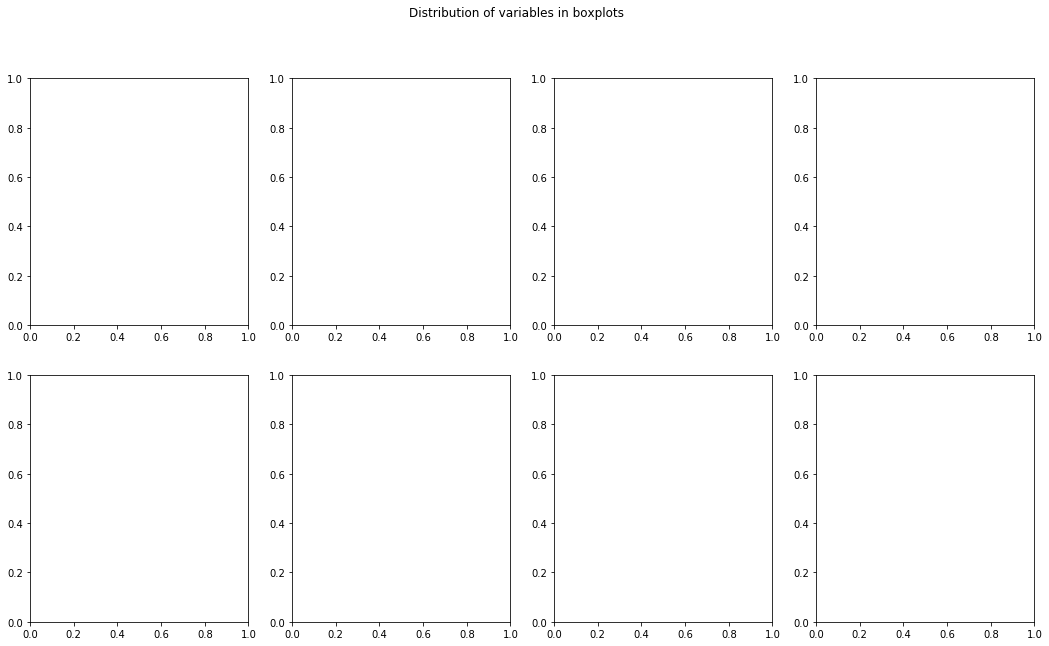

In [40]:
# EXAMPLEEEEE

sns.boxplot(df_num['wage'])

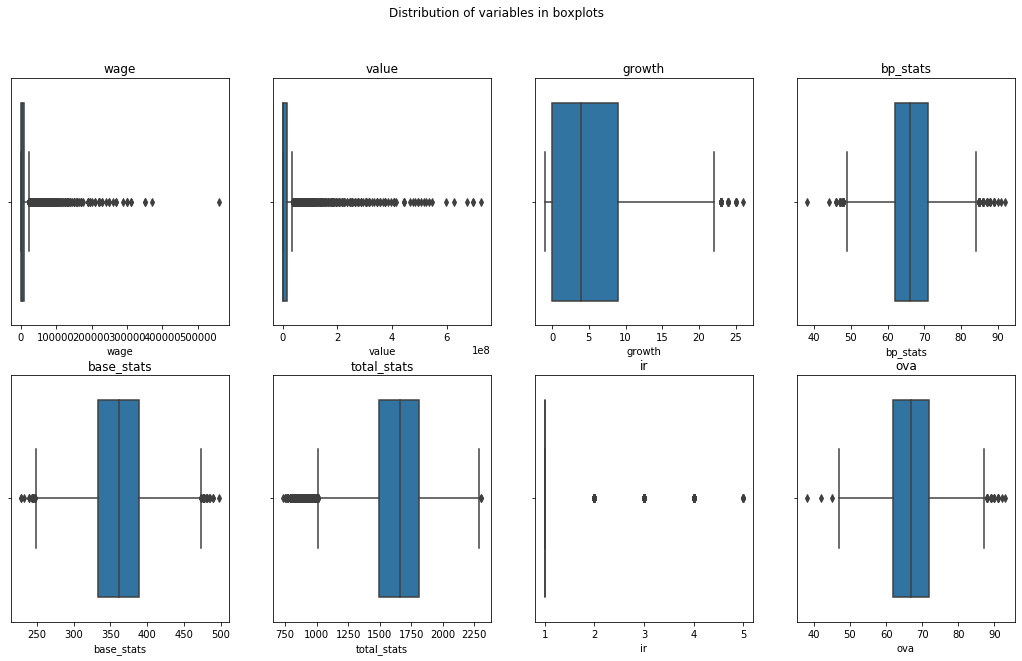

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

fig.suptitle('Distribution of variables in boxplots')

sns.boxplot(ax=axes[0, 0],data= df_num, x= 'wage').set(title= 'wage')
sns.boxplot(ax=axes[0, 1],data= df_num, x= 'value' ).set(title= 'value')
sns.boxplot(ax=axes[0, 2],data= df_num, x= 'growth' ).set(title= 'growth')
sns.boxplot(ax=axes[0, 3],data= df_num, x= 'bp_stats').set(title= 'bp_stats')
sns.boxplot(ax=axes[1, 0],data= df_num, x= 'base_stats').set(title= 'base_stats')
sns.boxplot(ax=axes[1, 1],data= df_num, x= 'total_stats').set(title= 'total_stats')
sns.boxplot(ax=axes[1, 2],data= df_num, x= 'ir').set(title= 'ir')
sns.boxplot(ax=axes[1, 3],data= df_num, x= 'ova').set(title= 'ova');

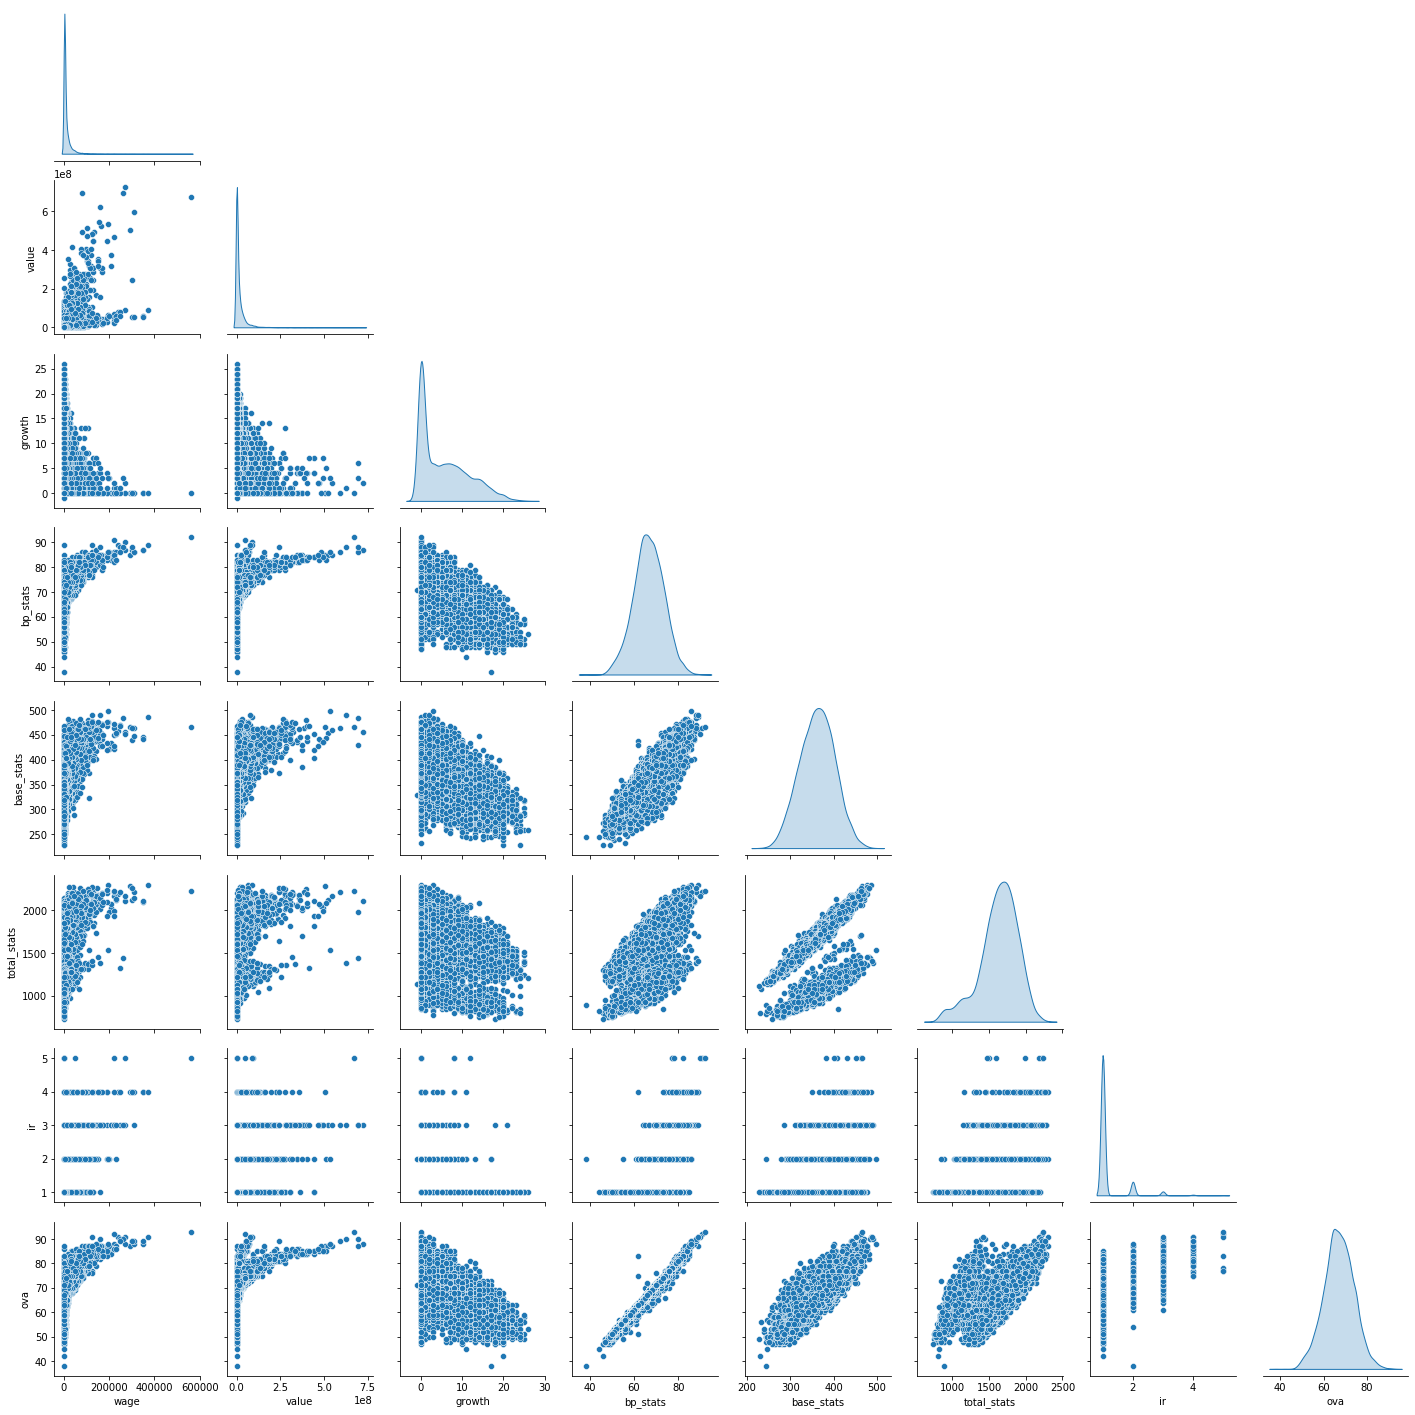

In [25]:
sns.pairplot(df_num, diag_kind= 'kde', corner= True);

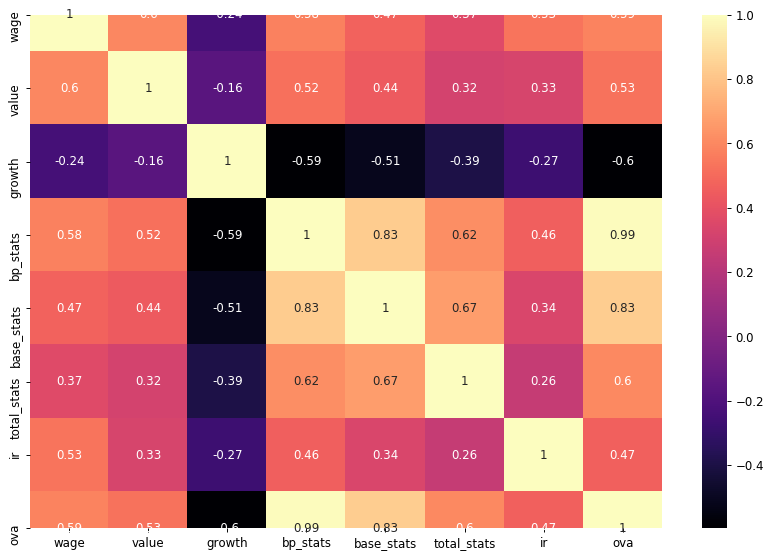

In [26]:
# Checking the correlation btween variables

plt.figure(figsize= (12,8), dpi= 85)

corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');

<Figure size 1020x680 with 0 Axes>

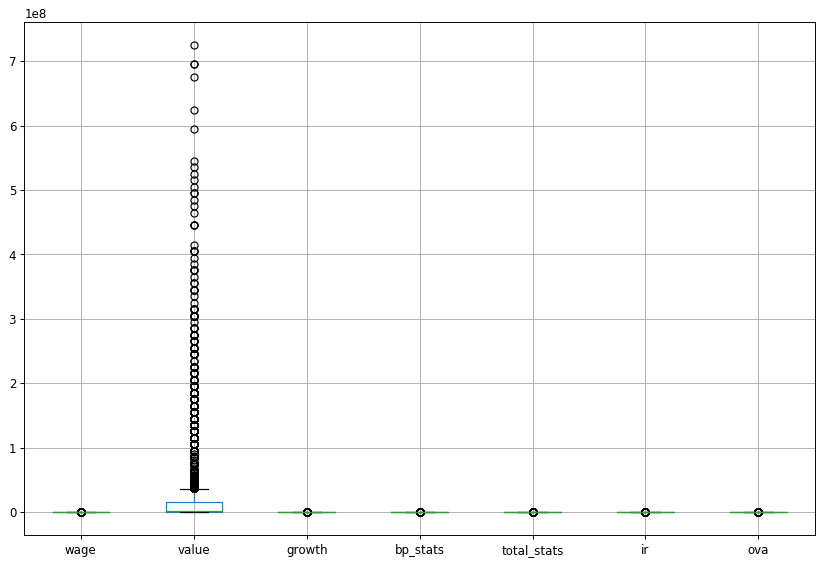

In [27]:
# need for data standarization
plt.figure(figsize= (12,8), dpi= 85)

#df_num.boxplot()
df_num.boxplot(['wage', 'value', 'growth', 'bp_stats', 'total_stats', 'ir', 'ova' ])

In [28]:
df_num.head()

,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
13701,23000,85000000,0,77,412,1961,2,77
13718,6000,825000,3,66,366,1656,1,66
13722,900,325000,17,58,310,1428,1,59
13724,3000,475000,3,63,345,1626,1,63
13728,16000,9000000,0,77,402,1889,1,77


In [29]:
y = df_num['ova']
X = df_num.drop(['ova'], axis=1)

In [30]:
# Scaling variables

MinMaxtransformer = MinMaxScaler().fit(df_num)
x_normalized = MinMaxtransformer.transform(df_num)
x_normalized.shape
x_normalized = pd.DataFrame(x_normalized,columns=df_num.columns)
x_normalized.head(2)

(13700, 8)

,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
0,0.041071,0.117241,0.037037,0.722222,0.681481,0.781945,0.25,0.709091
1,0.010714,0.001138,0.148148,0.518519,0.511111,0.588048,0.00,0.509091


In [31]:
Standardtransformer = StandardScaler().fit(df_num)
x_standardized = Standardtransformer.transform(df_num)
x_standardized.shape
x_standardized = pd.DataFrame(x_standardized,columns=df_num.columns)
x_standardized.head(2)

(13700, 8)

,wage,value,growth,bp_stats,base_stats,total_stats,ir,ova
0,0.596462,1.829558,-0.950485,1.539813,1.258988,1.267915,1.868479,1.465624
1,-0.210995,-0.376523,-0.432973,-0.078048,0.116328,0.099228,-0.329165,-0.137889


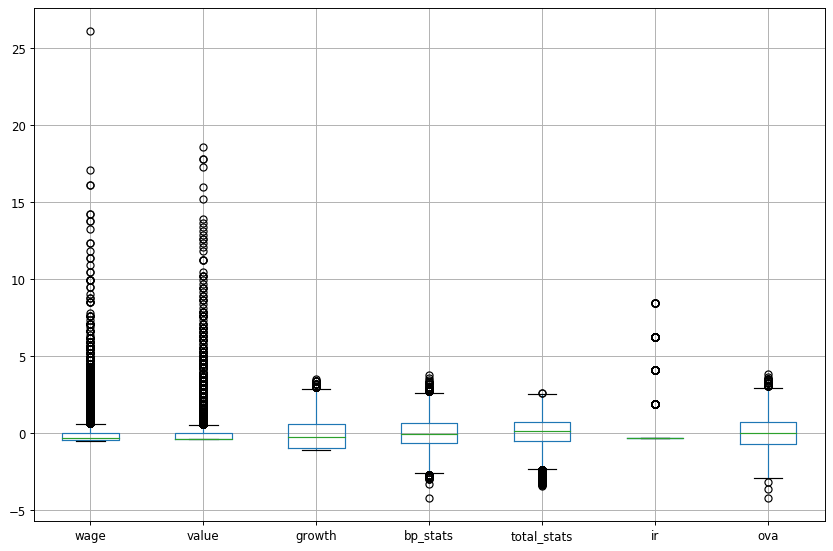

In [32]:
plt.figure(figsize= (12,8), dpi= 85)

#df_num.boxplot()
x_standardized.boxplot(['wage', 'value', 'growth', 'bp_stats', 'total_stats', 'ir', 'ova' ]);

In [33]:
X.head(2)
y.head(2)

,wage,value,growth,bp_stats,base_stats,total_stats,ir
13701,23000,85000000,0,77,412,1961,2
13718,6000,825000,3,66,366,1656,1


13701    77
13718    66
Name: ova, dtype: int64

In [34]:
# Splitting and training the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000)

In [35]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [36]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.982166420436871

In [37]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.8712048905246048


In [38]:
rmse = math.sqrt(mse)
print(rmse)

0.9333835709528022


In [39]:
r2 = r2_score(y_test, predictions)
r2

0.982166420436871

In [ ]:
pickle.dump(r2_score, open('trained_model.p', 'wb'))

In [ ]:
X_test.to_pickle('xtest.p')
y_test.to_pickle('ytest.p')